c:\Users\Cemre\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cemre\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


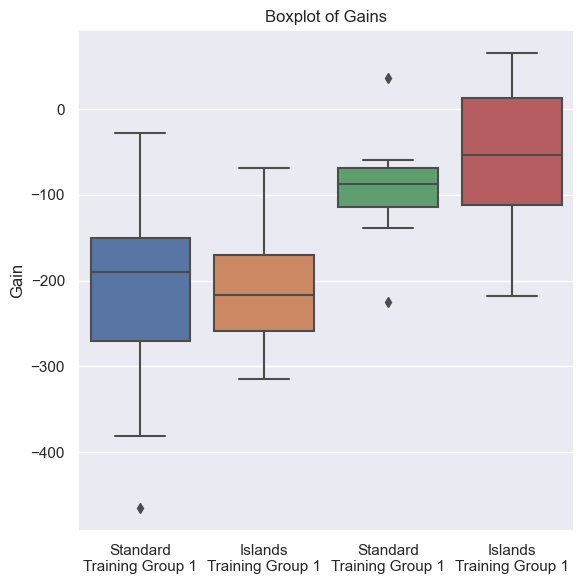

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_theme() #optional: set seaborn theme
results_folder = "results"

if not os.path.exists(results_folder):
    print(f"Error: The folder '{results_folder}' does not exist.")
    exit()

csv_files = [f for f in os.listdir(results_folder) if f.endswith('.csv')]

if not csv_files:
    print("Error: No CSV files found in the results folder.")
    exit()

combined_data = []
dataset_names = []

for file in csv_files:
    filepath = os.path.join(results_folder, file)
    try:
        df = pd.read_csv(filepath)
        df['dataset'] = file
        combined_data.append(df)
        dataset_names.append(file)
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Warning: Error processing '{file}': {e}. Skipping.")
        continue


if not combined_data:
    print("Error: No usable data found in the CSV files.")
    exit()

combined_df = pd.concat(combined_data)

#Customize order, names, and colors
dataset_order = ['alg1_1468.csv', 'alg2_1468.csv', 'alg1_2357.csv', 'alg2_2357.csv'] #Replace with your desired order.  Must match filenames.
dataset_labels = ['', 'Standard, Games 1, 4, 6, 8', 'Dataset C', 'Dataset D'] #Replace with your desired labels
palette = sns.color_palette() #Or any other color palette from Seaborn, Matplotlib, or a custom list.


plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="dataset", y="gain", data=combined_df, order=dataset_order, palette=palette)
plt.xlabel("")
plt.ylabel("Gain")
plt.title("Boxplot of Gains")

# Custom labels with a common label
xticklabels = ['Standard\nTraining Group 1', 'Islands\nTraining Group 1', 'Standard\nTraining Group 2', 'Islands\nTraining Group 2']  # Customize as needed
ax.set_xticklabels(xticklabels)



plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind
final_alg_1 = df_alg_1[df_alg_1.index==50]
final_alg_2 = df_alg_2[df_alg_2.index==50]

print(ttest_ind(final_alg_1["Mean"], final_alg_2["Mean"]))
print(ttest_ind(final_alg_1["Best"], final_alg_2["Best"]))